# Приложение 1, вариант 5
$${\displaystyle y = \frac{1}{t}· \cos (2\pi t), \; t ∈ [1, 10]}$$
## Часть 1-2

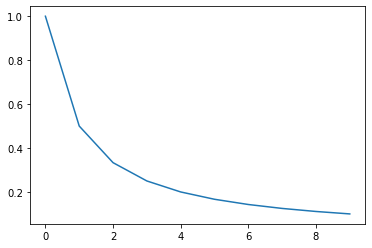

In [4]:
from math import cos, pi
from matplotlib import pyplot as plt
x = [t for t in range(10)]
y = [(1/t)*cos(2*pi*t) for t in range(1, 11)] # при range(10) возникнет деление на 0
plt.plot(x, y)

*Чтобы график не закрывался после создания класса plt.plot(x, y), нужно после этого вызвать функцию `plt.show()`*

Задаем новый цвет линии, тип линии, маркеров. Добаляем сетку:

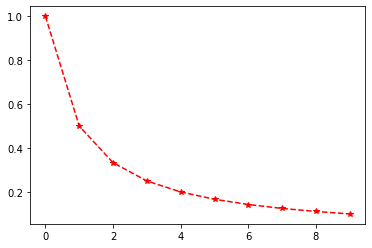

In [5]:
plt.plot(x, y, color="red", linestyle="--", marker="*")

Изменяем шаг выборки данных: если мы используем простую функцию `range()` для создания области определения функции, то мы не сможем использовать  нецелочисленный шаг. Для диапазона значений с плавающей запятой используется класс `Arrange` из модуля `NumPy`.

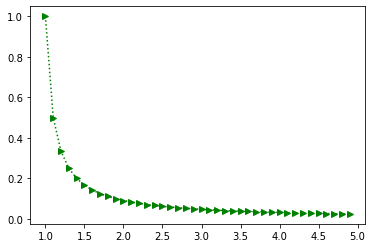

In [8]:
from numpy import arange
x = arange(1, 5, 0.1)
y = [(1/t)*cos(2*pi*t) for t in range(1, len(x)+1)]
# количество точек по Ox и по Oy должны совпадать, поэтому берем len(x). При этом,
# чтобы избежать деления на 0, начинаем идти с 1 до len(x)+1
plt.plot(x, y, color="green", linestyle=":", marker=">")

Добавляем в график сетку и сохраняем в png, pdf, jpg, eps:

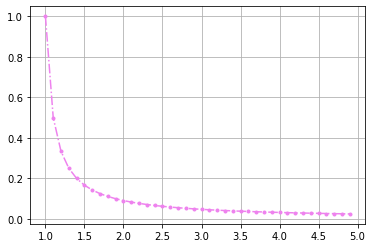

In [12]:
plt.plot(x, y, color="violet", linestyle="-.", marker=".")
plt.grid()
for i in ['png', 'pdf', 'jpg', 'eps']:
    plt.savefig(f"homework.{i}")

## Часть 3

Графики степенных многочленов со степенями от 1 до 6 на отрезке [-1; 1]

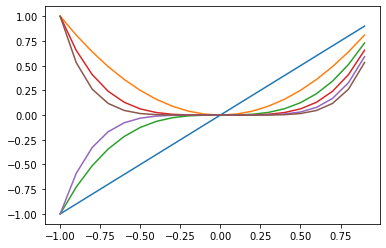

In [57]:
x = arange(-1, 1, 0.1)
for power in range(1, 7):
    plt.plot(x, x**power)

<div style="text-align: center;">Синусоиды с разными частотами</div>
$$y = \sin (\omega t), \; \omega \in [\pi, 2\pi, 3\pi, ..., 8\pi], \, t \in [-1; 1]$$

Text(0.5, 1.0, 'Синусоиды с периодом от 6π, 7π и 8π')

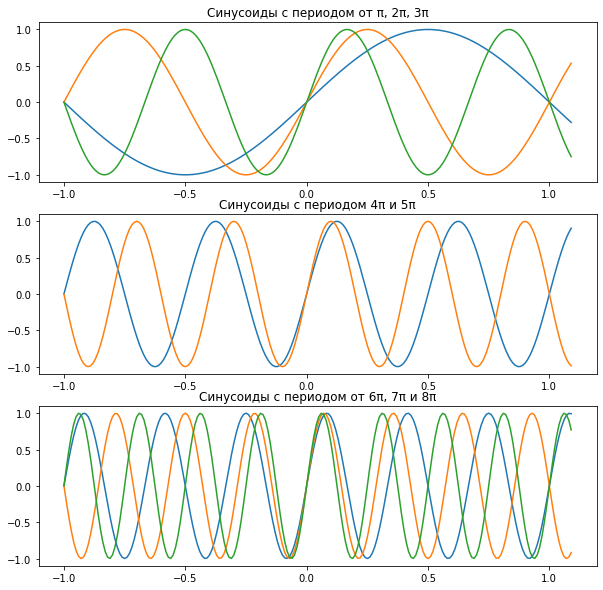

In [90]:
from numpy import sin
plt.rcParams['figure.figsize'] = [10, 10] # задаем размер графика

t = arange(-1, 1.1, 0.01)

plt.subplot(3, 1, 1)
for period in range(1, 4):
    plt.plot(t, sin(t*period*pi))
plt.title('Синусоиды с периодом от π, 2π, 3π')

plt.subplot(3, 1, 2)
for period in range(4, 6):
    plt.plot(t, sin(t*period*pi))
plt.title('Синусоиды с периодом 4π и 5π')

plt.subplot(3, 1, 3)
for period in range(6, 9):
    plt.plot(t, sin(t*period*pi))
plt.title('Синусоиды с периодом от 6π, 7π и 8π')

<div style="text-align: center;">Синусоиды с разными начальными фазами</div>
$${\displaystyle y = \sin(2\pi t + φ), \; φ ∈ \biggl[0, \frac{π}{6}, ... \frac{5π}{6}\biggr], \; t ∈ [-1; 1]}$$

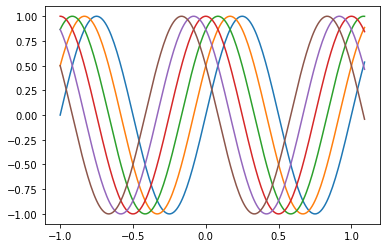

In [80]:
for i in range(0, 6):
    plt.plot(t, sin(2*t*pi + (i*pi)/6))

<div style="text-align: center;">Логарифмические функции</div>
$${\displaystyle \log_2(x), \, \ln(x),\, \log_{10}(x), \; x \in [1; 10]}$$

В библиотеке `numpy` нет функции логарифма по произвольному основанию, но его можно вычислить по натуральному логарифму через формулу замены основания логарифма:
$${\displaystyle \frac{\log_a(b)}{\log_a(c)} = \log_c(b)}$$

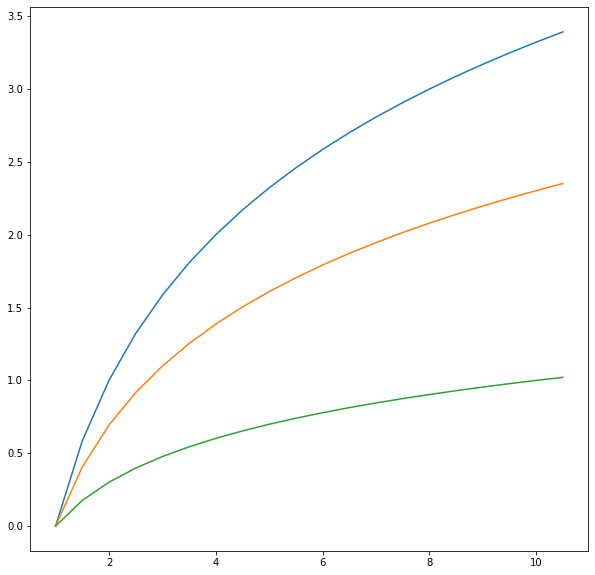

In [98]:
from numpy import log, log2, log10
x = arange(1, 11, 0.5)
plt.plot(x, log2(x), x, log(x), x, log10(x)) 
# вместо цикла for можно сразу последовательно передавать массивы аргументов и функций при одном вызове

<div style="text-align: center;">Гиперболические функции через экспоненту</div>
$$\begin{cases}
{\displaystyle sh(x) = \frac{e^x - e^{-x}}{2},} \\{\displaystyle ch(x)=\frac{e^x+e^{-x}}{2},}\\ {\displaystyle th(x)=\frac{sh(x)}{ch(x)}=\frac{e^x - e^{-x}}{e^x + e^{-x}}}\end{cases} \; x \in [-10; 10]$$

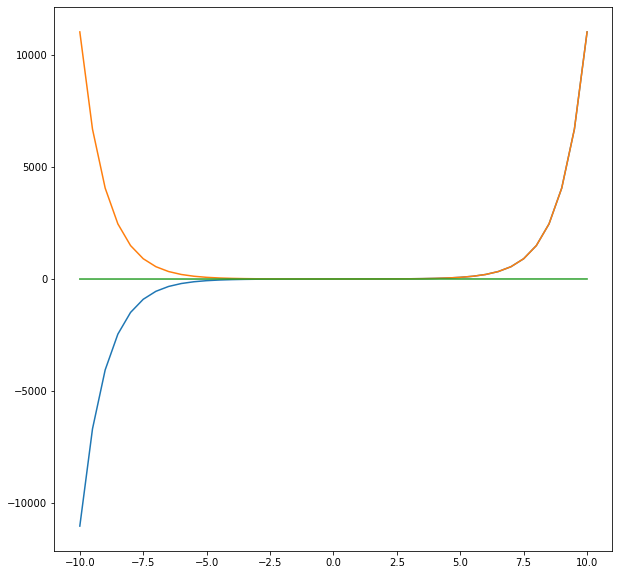

In [105]:
from math import e
sinh = lambda x: (e**(x) - e**(-x))/2
cosh = lambda x: (e**x + e**(-x))/2
x = arange(-10, 10.5, 0.5)
plt.plot(x, sinh(x), x, cosh(x), x, sinh(x)/cosh(x))

## Часть 4

Напишем функцию, которая будет сохранять картинку с графиками по заданным параметрам:
- Тип графика (синусоиды с разными периодами, синусоиды с разными фазами, логарифмические функции или же гиперболические функции из части 3)
- Количество функций на картинке
- Сколько функций помещает в себе каждый график 
- Как располагаются графики на картинке (количество рядом, количество столбцов)

In [116]:
from numpy import sin, log, log2, log10, e, pi

avaible_functions = {
    "sin_period": lambda x, period: sin(x * period * pi),
    "sin_phase": lambda x, part: sin(2*x*pi + (pi*part)/6),
    "sinh": lambda x: (e**x - e**(-x))/2,
    "cosh": lambda x: (e**x + e**(-x))/2,
    "ln": lambda x: log(x),
    "log2": lambda x: log2(x),
    "log10": lambda x: log10(x)
}

Поскольку график синусоид содержит параметр (коэффициент в периоде или фазе), то для их отрисовки нужно писать отдельную функцию:

In [114]:
from typing import Callable

def sinusoidal_f(full_range: int, funcs_in_one_plot: int, rows: int, domain: arange,
                  sin_lambda: Callable[[arange, int], arange], saved_format: str):

    """
    Число строк в фигуре будет вычисляться исходя из full_range, funcs_in_one_plot и rows.
    Пример:
    - Сумммарное число функций full_range=10
    - Максимальное число функций в одном графике funcs_in_one_plot=3
    - Столбцов rows=3
    10/3= 3.33 → 4 графика в фигуре
    4/3=1.33 → 2 строки в фигуре
    """
    ceil_func = lambda a, b: a//b+1 if type(a/b)== float else a//b

    columns = ceil_func(ceil_func(full_range, funcs_in_one_plot), rows)

    plt.rcParams['figure.figsize'] = [10, 10]  # оптимальный размер для графиков синусоид
    plt.rcParams['axes.grid'] = True  # отображаем сетку для всех графиков

    graphs_in_plot = 0   # счетчик нарисованных функций в одном графике (будет обнуляться)
    ind_of_subpl = 1  # номер графика (этот порядковый номер нужен для subplot)
    current_func = 1  # номер функции, которая будет сейчас отрисовываться, совпадает со значением параметра
    # то есть если рисуется первая функция, то у нее период будет 1π или фаза 1π/6

    plt.subplot(columns, rows, ind_of_subpl)  # рисуем самый первый график в фигуре (самый первый subplot)


    while current_func <= full_range:  # пока не отрисуются все функции в фигуре
        if graphs_in_plot == funcs_in_one_plot:  # как только количество функций превысит лимит в одном графике
            ind_of_subpl += 1  # количество (индекс) subplot увеличивается
            plt.subplot(columns, rows, ind_of_subpl)  # рисуем новый subplot
            graphs_in_plot = 0  # обнуляем счетчик функций в одном графике для нового subplot
        plt.plot(domain, sin_lambda(domain, current_func))  # рисуем функцию в текущем subplot
        current_func += 1  # количество отрисованных функций во всей картинке увеличивается
        graphs_in_plot += 1
    plt.show()  # не закрываем график по окончанию отрисовки
    plt.savefig(f"{columns}columns_{rows}rows.{saved_format}")

Рисуем семейство функций в один столбец $y = \sin (n·\pi · t), \; n ∈ [1; 8], \, t \in [-1; 1]$, поместим в один `subplot` по два графика, сохраним график в формате png

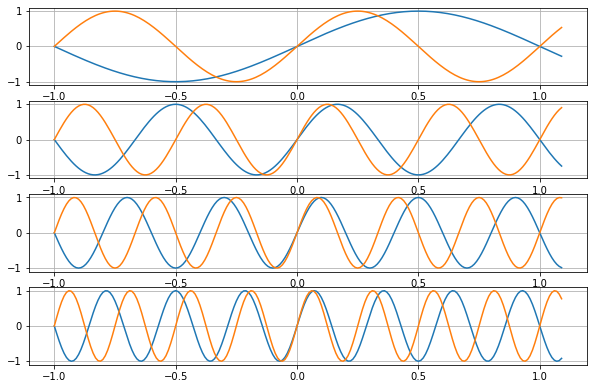

<Figure size 720x720 with 0 Axes>

In [117]:
call1 = {"rows": 1, "domain": arange(-1, 1.1, 0.01, dtype="float32"),
         "funcs_in_one_plot": 2, "full_range": 8, "sin_lambda": avaible_functions["sin_period"],
          "saved_format": "png"}

sinusoidal_f(**call1)

Рисуем семейство функций ${\displaystyle y = \sin \biggl(2\pi t + \frac{n·\pi}{6}\biggr), \; n ∈ [0; 5], \; t ∈ [-1; 1]}$ по одной функции в `subplot` в два столбца, сохраним в формате jpg

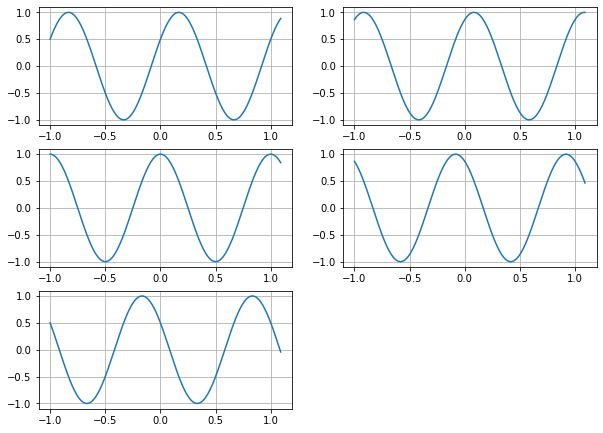

<Figure size 720x720 with 0 Axes>

In [118]:
call2 = {"rows": 2, "domain": arange(-1, 1.1, 0.01, dtype="float32"),
         "funcs_in_one_plot": 1, "full_range": 5, "sin_lambda": avaible_functions["sin_phase"],
          "saved_format": "jpg"}

sinusoidal_f(**call2)

Семейства функций с разными периодами в три столбца:

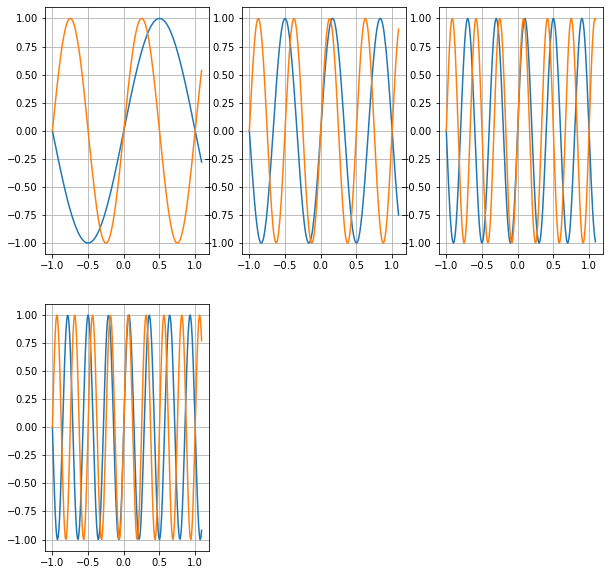

<Figure size 720x720 with 0 Axes>

In [119]:
call1["rows"] = 3
sinusoidal_f(**call1)

Семейства функций с разными фазами в одну строку:

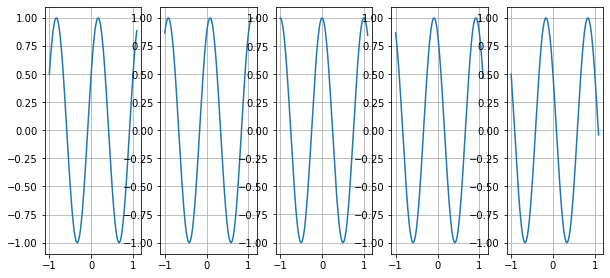

<Figure size 720x720 with 0 Axes>

In [121]:
call2["rows"] = 5  # т.к. 5 функций по одному графику в каждой
sinusoidal_f(**call2)

## Часть 5

У каждого студента есть следующие характеристи за сессию:
- Список оценок за каждый предмет
- Дата выставления оценок за каждый предмет: если оценка поставлена до дедлайна, то задолженности не было; если вместо даты стоит прочерк, то есть задолженность; если оценка поставленна после дедлайна, то задолженность была, но закрыта

Выглядеть эти данные могут в виде словаря. 

In [173]:
# в − вовремя, - − не сдано, п - пересдача
group1 = {
    "Liza": [(5, "в"), (5, "в"), (5, "в"), (5, "в"), (5, "п"), (5, "п")],
    "Georgy": [(4, "в"), (3, "п"), (4, "в"), (5, "в"), (3, "в"), (4, "в")],
    "Steve": [(4, "в"), (4, "в"), (4, "в"), (5, "п"), (5, "в"), (4, "в")],
    "Kate": [(3, "в"), (5, "в"), (5, "в"), (4, "в"), (4, "в"), (4, "в")],
    "Imanbek": [(4, "в"), (3, "в"), (3, "в"), (5, "в"), (3, "в"), (4, "в")],
    "Fatima": [("-", "-"), (3, "п"), (4, "в"), (5, "в"), (4, "в"), (4, "в")],
    "Mizuki": [("-", "-"), (3, "п"), (4, "в"), (4, "в"), (4, "в"), (4, "в")],
    "Bill": [("-", "-"), (2, "в"), ("-", "-"), (4, "в"), ("-", "-"), (4, "в")],
    "Dasha": [(3, "в"), (4, "в"), (4, "в"), (5, "в"), (3, "в"), (4, "в")],
    "Lia": [(4, "в"), (3, "п"), (3, "в"), (5, "в"), (3, "в"), (4, "в")]
}

Для нахождения отличников и хорошистов от общего числа студентов, напишем функцию:

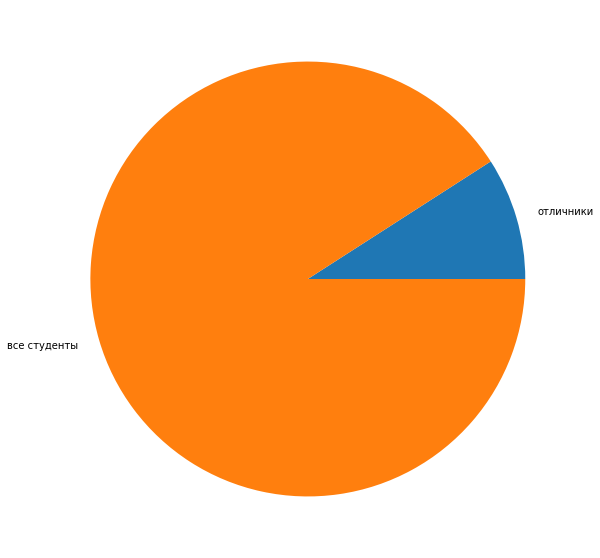

In [178]:
options = {
    "отличники": lambda student: False if any(mark[0]!=5 for mark in student) else True,
    "ударники": lambda student: False if any(mark[0] not in [5, 4] for mark in student) else True,
    "закрыли вовремя с 3": lambda student: False if any(mark[1]=='п' for mark in student) else True,
    "закрыли с опозданием": lambda student: False if any(mark[1]=="-" for mark in student) else True,
    "отчислены": lambda student: True if any(mark[1]=='-' for mark in student) else False
}



def how_many_students(group: dict, option: dict):
    if option not in options:
        raise Exception("Такого варианта нет")
    all_students = len(group.keys())
    a_students = 0
    for student in group.values():
        cuite = True
        cuite = options[option](student)
        if cuite:
            a_students += 1
    plt.pie([a_students, all_students], labels=[option, "все студенты"])
    plt.show()
    
how_many_students(group1, "отличники")

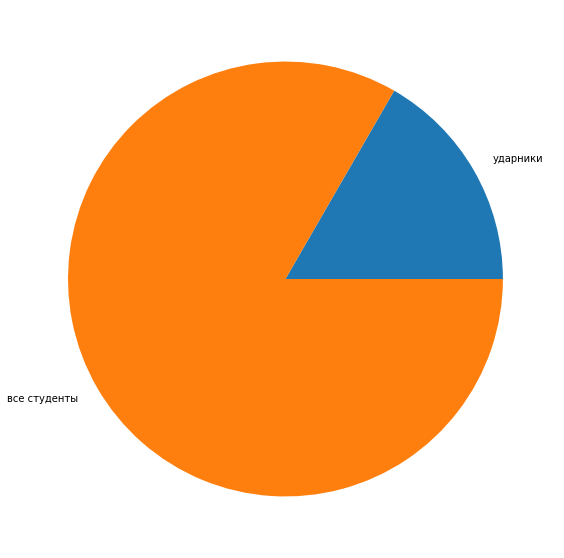

In [179]:
how_many_students(group1, "ударники")

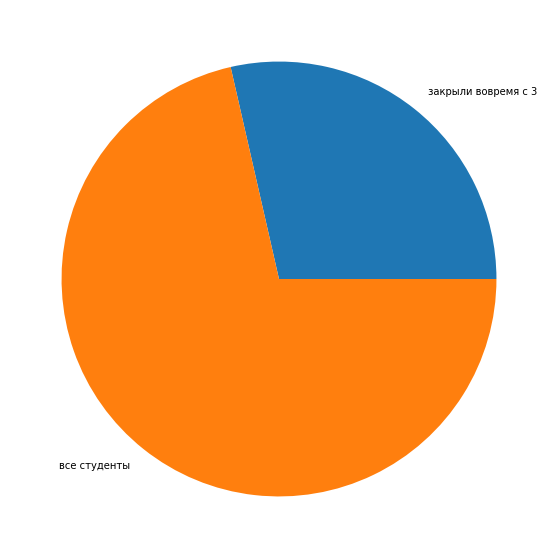

In [180]:
how_many_students(group1, "закрыли вовремя с 3")

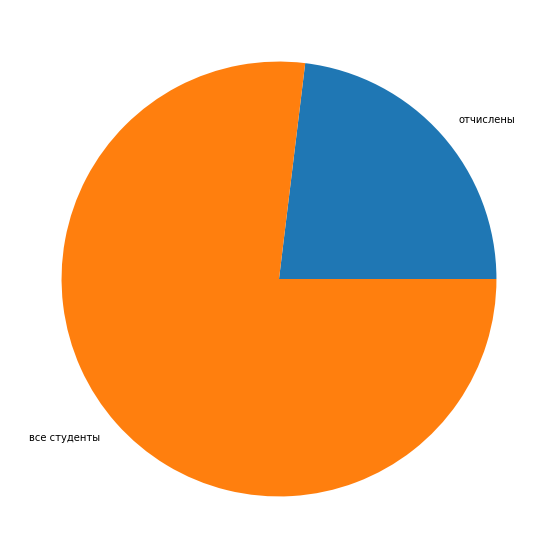

In [182]:
how_many_students(group1, "отчислены")

## Часть 6

Построить закрашенную контурную диаграмму и трехмерных график для функций двух переменных $z = x²-y²+x$, определенных в прямоугольной области $x ∈ [-3; 3], y∈[-3; 3]$

---------------------

Для построения функций двух переменных мы берем вектора (одномерные массивы) 
$${\displaystyle 
    y=\left[
    {
    \begin{array}{c}
    31_{11}\\
    47_{21} \\
    2_{31}
    \end{array} 
    }
    \right]  \quad    
    x = [9_{11}\; 6_{12}\; 4_{13}] }$$

и превращаем их в матрицу (двумерный массив), которая представляет собой решетку, выбрав узел которой мы сможем взять любую возможную комбинацию элемента из $x$ и элемента из $y$:
$$ 
{\displaystyle
y=\left[
{
\begin{array}{ccc}
31_{11} & 31_{12}&31_{13} \\
47_{21}&47_{22}&47_{23}\\
2_{31}&2_{32}&2_{33}
\end{array}
}
\right] \quad
x= \left[ {
\begin{array}{ccc}
9_{11} & 6_{12}&4_{13} \\
9_{21}&6_{22}&4_{23}\\
9_{31}&6_{32}&4_{33}
\end{array} } \right] }$$
Например, если мы хотим передать функции значение 47 из y и значение 6 из x, то на решетке будет под индексом на пересечении $y_{21} - y_{23}$ и $x_{12} - x_{32}$, то есть $y_{22} x_{22}$

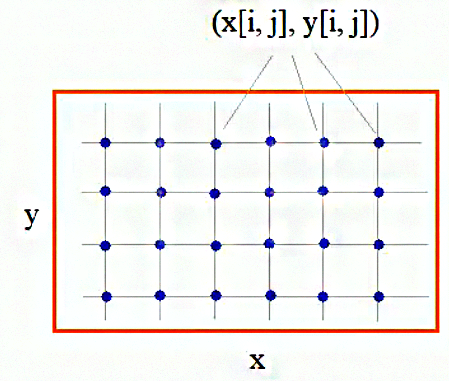

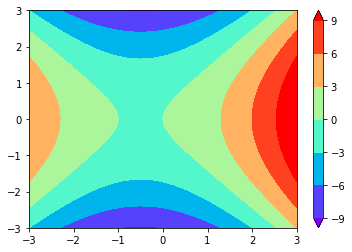

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-3, 3.01, 0.1)
y = np.arange(-3, 3.01, 0.1)
xx, yy = np.meshgrid(x, y) # строим сетку на основе одномерных массивов
z = xx**2-yy**2+x
plt.contourf(xx, yy, z, extend='both', cmap="rainbow")
plt.colorbar()

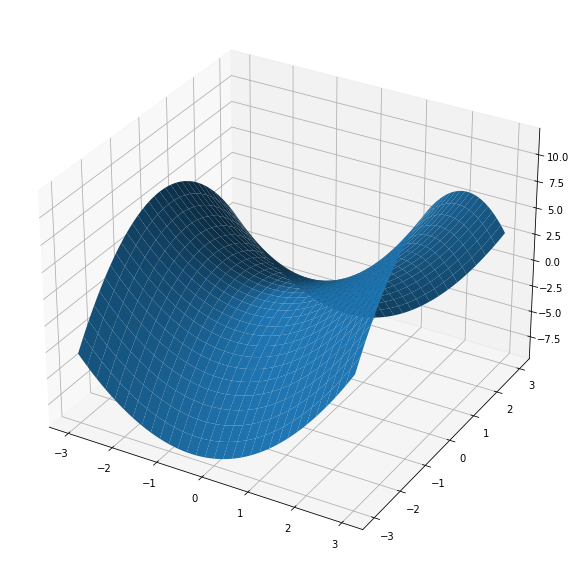

In [21]:
 # для трехмерного графика сначала добавляются оси
fig = plt.figure(figsize=(10, 40))
axes = fig.add_subplot(projection="3d")
axes.plot_surface(xx, yy, z)